In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
%store -r train
%store -r null_vals

In [4]:
print(train.shape)

(1448, 195)


In [5]:
y = train.log_SalePrice
X = train.drop(['SalePrice', 'Id', 'log_SalePrice'], axis=1)
print(X.shape)
print(y.shape)

(1448, 192)
(1448,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=42)

In [31]:
ols = LinearRegression()
model = ols.fit(X_train, y_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))
print('-'*50)
print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.947442
--------------------------------------------------
R^2 for test  set: 0.903612


In [32]:
predictions = ols.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.015166873231451286


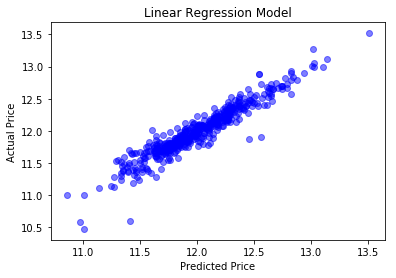

In [16]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.5,
            color='b') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

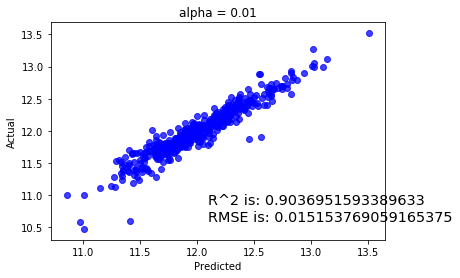

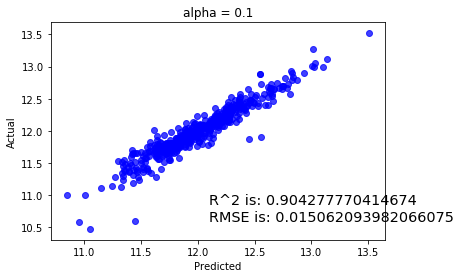

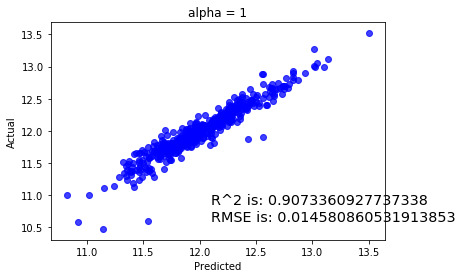

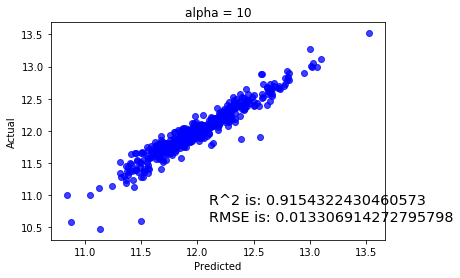

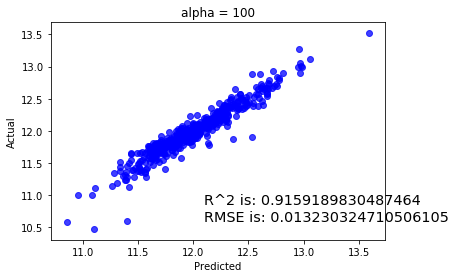

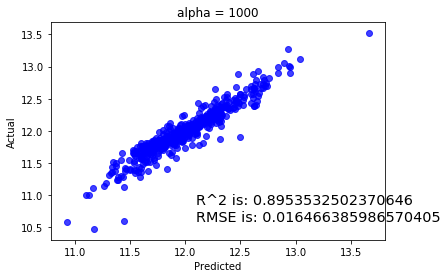

In [29]:
for i in range (-2, 4):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

## RIDGE MODEL WITH ALPHA = 100

In [26]:
ridge_reg = linear_model.Ridge(alpha=100)

In [27]:
ridge_model = ridge_reg.fit(X_train, y_train)
ridge_predict = ridge_model.predict(X_test)

In [30]:
print("R^2 for train set: %f" %ridge_lr.score(X_train, y_train))
print('-'*50)
print("R^2 for test  set: %f" %ridge_lr.score(X_test, y_test))

R^2 for train set: 0.926139
--------------------------------------------------
R^2 for test  set: 0.915919


## MODEL FOR SUBMISSION